In [19]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [20]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=10

In [ ]:
dataset= tf.keras.preprocessing.image_dataset_from_directory(
    "/content/gdrive/MyDrive/Plant_leave_diseases_dataset",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
    
)

Found 2968 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___healthy']

In [ ]:
len(dataset)

93

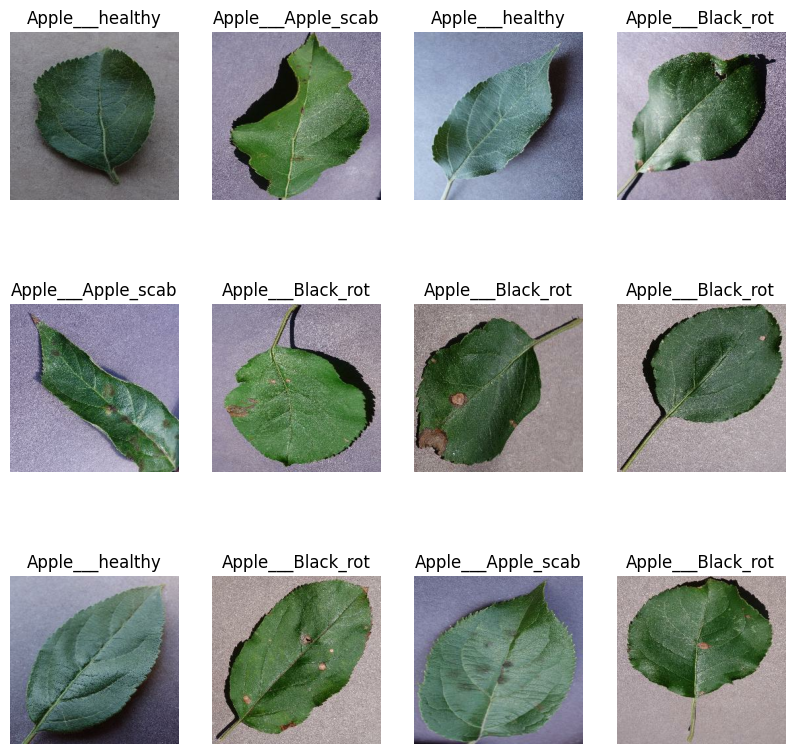

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
  for i in range(12):

  # print(image_batch.shape)
  # print(label_batch.numpy())
  # print(image_batch[0].numpy())
   ax = plt.subplot(3,4,i+1)
   plt.imshow(image_batch[i].numpy().astype("uint8"))
   plt.title(class_names[label_batch[i]])
   plt.axis("off")
  

In [ ]:
# len(dataset)
train_size=0.8
len(dataset)*train_size

74.4

In [ ]:
#80%--->training
#10--->validation
#10%---->test

In [ ]:
train_ds=dataset.take(74)
len(train_ds)

74

In [ ]:
test_ds=dataset.skip(54)
len(test_ds)

39

In [ ]:
val_size=0.1
len(dataset)*val_size

9.3

In [ ]:
val_ds=test_ds.take(9)
len(val_ds)

9

In [ ]:
test_ds=test_ds.skip(9)
len(test_ds)

30

In [ ]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,shuffle=True,shuffle_size=10000):
  ds_size=len(ds)
  if shuffle:
    ds=ds.shuffle(shuffle_size,seed=12)
  train_size = int(train_split*ds_size)
  val_size = int(val_split*ds_size)
  train_ds=ds.take(train_size)
  val_ds=ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)

  return train_ds, val_ds, test_ds



In [ ]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(dataset)
len(train_ds)


74

In [ ]:
len(val_ds)

9

In [ ]:
len(test_ds)

10

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)])

In [ ]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3 
 
 
model = models.Sequential([
     resize_and_rescale,
     data_augmentation,
     layers.Conv2D(32,(3,3),activation='relu',input_shape= input_shape),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64, kernel_size=(3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64, kernel_size=(3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,(3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,(3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,(3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
     layers.Flatten(),
     layers.Dense(64,activation='relu'),
     layers.Dense(n_classes,activation='softmax'),

])


model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [ ]:
#optimization
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [18]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds

)

Epoch 1/10
74/74 [==============================] - 737s 5s/step - loss: 0.9505 - accuracy: 0.5424 - val_loss: 0.8214 - val_accuracy: 0.6319
Epoch 2/10
74/74 [==============================] - 378s 5s/step - loss: 0.6945 - accuracy: 0.7314 - val_loss: 0.5388 - val_accuracy: 0.8056
Epoch 3/10
74/74 [==============================] - 373s 5s/step - loss: 0.5201 - accuracy: 0.7936 - val_loss: 0.3125 - val_accuracy: 0.8993
Epoch 4/10
74/74 [==============================] - 368s 5s/step - loss: 0.3475 - accuracy: 0.8627 - val_loss: 0.2450 - val_accuracy: 0.8958
Epoch 5/10
74/74 [==============================] - 368s 5s/step - loss: 0.3088 - accuracy: 0.8822 - val_loss: 0.1480 - val_accuracy: 0.9479
Epoch 6/10
74/74 [==============================] - 362s 5s/step - loss: 0.2018 - accuracy: 0.9258 - val_loss: 0.1748 - val_accuracy: 0.9340
Epoch 7/10
74/74 [==============================] - 371s 5s/step - loss: 0.1629 - accuracy: 0.9419 - val_loss: 0.1082 - val_accuracy: 0.9549
Epoch 8/10
74

In [21]:
scores= model.evaluate(test_ds)

10/10 [==============================] - 22s 1s/step - loss: 0.1774 - accuracy: 0.9406


In [22]:
scores

[0.1773705780506134, 0.940625011920929]

In [23]:
history

In [24]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 74}

In [25]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
# history.history['accuracy']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

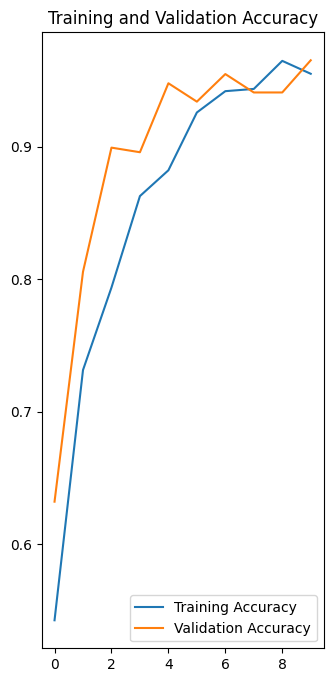

In [29]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

first image to predict
first image's actual label :  Apple___Black_rot
1/1 [==============================] - 2s 2s/step
THE PREDICTED DISEASE IS-----------
Apple___Black_rot


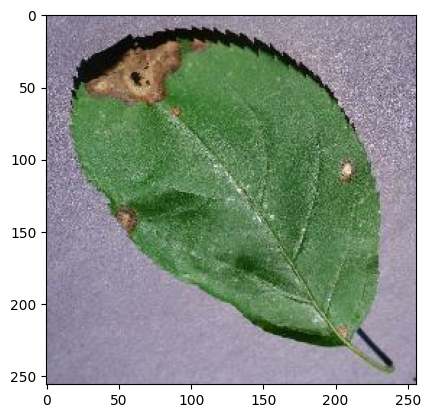

In [40]:
import numpy as np

for images_batch,labels_batch in test_ds.take(1):
  first_image=images_batch[0].numpy().astype('uint8')
  first_label=labels_batch[0]

  print("first image to predict")
  plt.imshow(first_image)
  print("first image's actual label : ",class_names[first_label])

  batch_prediction = model.predict(images_batch)
  print("THE PREDICTED DISEASE IS-----------")
  print(class_names[np.argmax(batch_prediction[0])])

In [41]:
# import numpy as np
# np.argmax([2.8719849e-04, 9.9966180e-01, 5.1034942e-05])

In [53]:
def predict(model,img):
  img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array=tf.expand_dims(img_array,0)   #create a batch
  predictions=model.predict(img_array)

  predicted_class = class_names[np.argmax(predictions[0])]
  confidence=round(100*(np.max(predictions[0])),2)
  return predicted_class,confidence

1/1 [==============================] - 0s 54ms/step


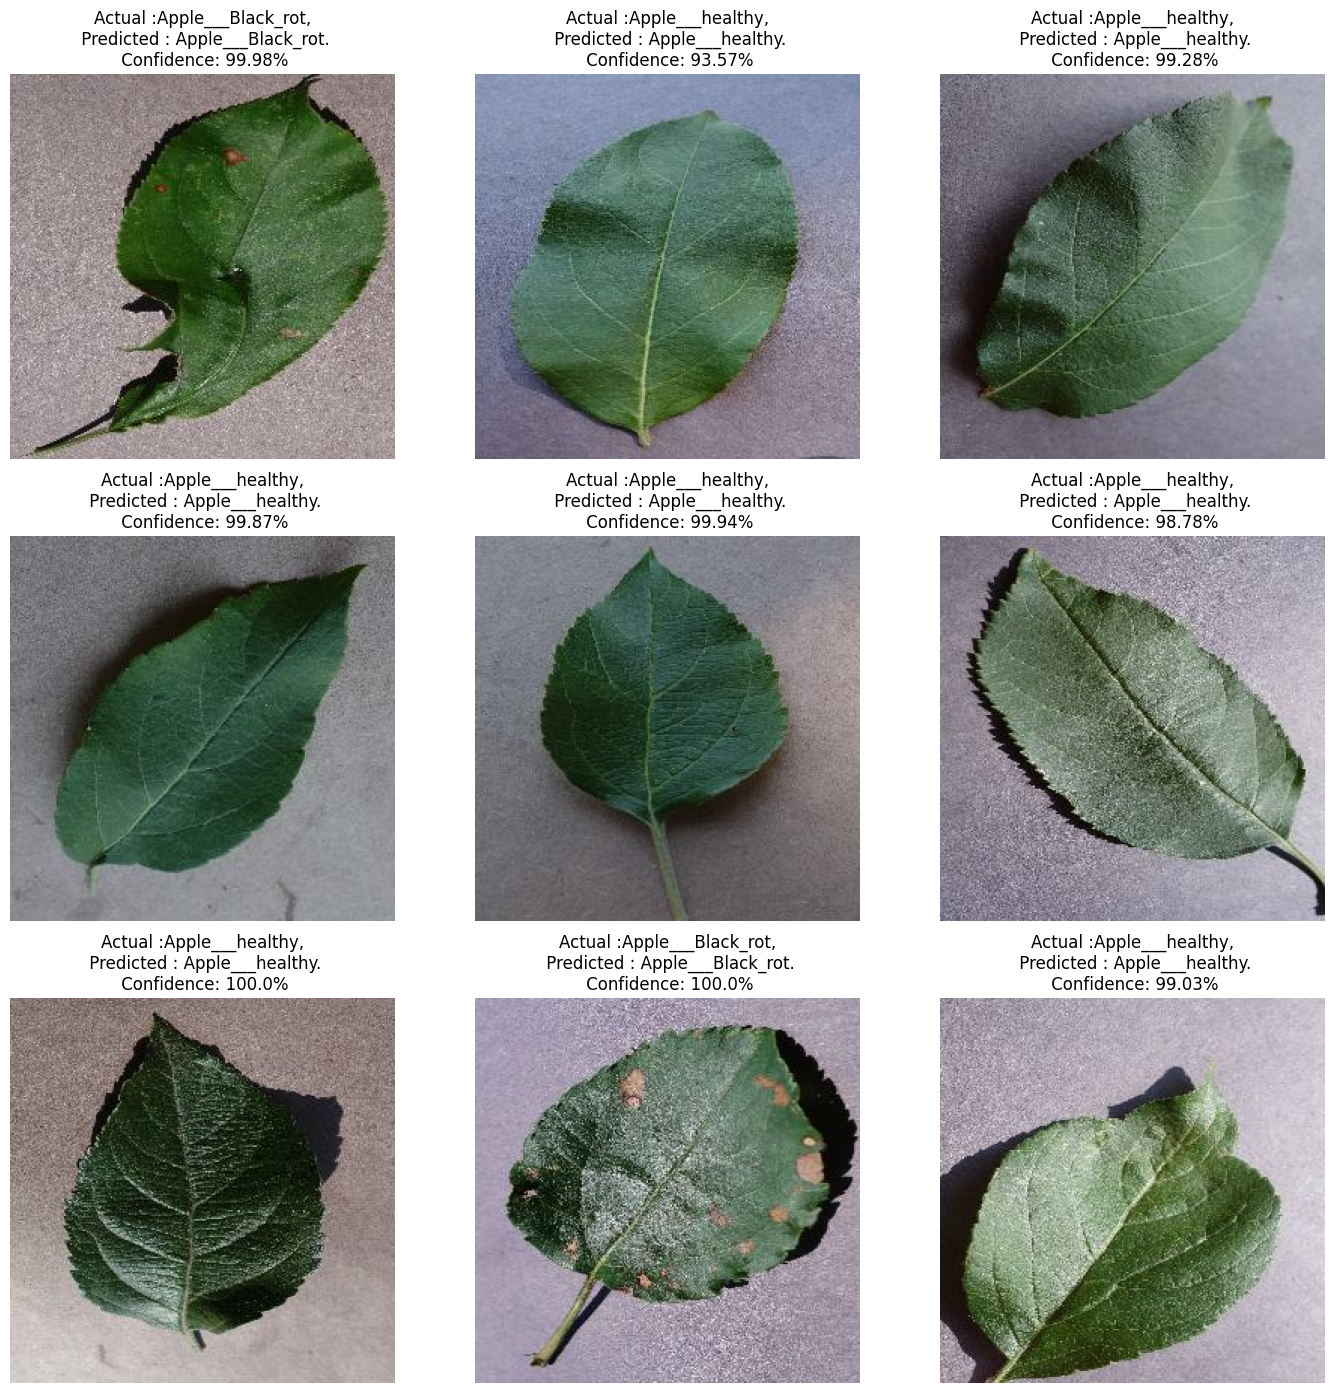

In [60]:
plt.figure(figsize=(17,17))
for images,labels in test_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    
    predicted_class,confidence = predict(model,images[i].numpy())
    actual_class = class_names[labels[i]]

    plt.title(f"Actual :{actual_class},\n Predicted : {predicted_class}.\n Confidence: {confidence}%") #python formal string

    plt.axis('off')


In [ ]:
model_version=1
model
